# Querying the MRIQC Web API

This notebook shows how the web-API can be leveraged to analyze the image quality metrics (IQMs) that have been extracted with MRIQC

This notebook is a derivative work of https://gist.github.com/chrisfilo/eccdb8b98f8e74d24a3395a49fbadf03

In [1]:
import pandas as pd
from json import load
import urllib.request, json 
from pandas.io.json import json_normalize
import seaborn as sns
import pylab as plt
import multiprocessing as mp
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth',500)

## Preparation

Let's define a function that will query the appropriate endpoint and a helper function to plot some distributions (at the bottom of this notebook).

In [2]:
def get_iqms(modality, versions=None, software='mriqc'):
    """
    Grab all iqms for the given modality and the list of versions
    """
    url_root = 'https://mriqc.nimh.nih.gov/api/v1/{modality}?{query}'
    page = 1
    dfs = []
    
    if versions is None:
        versions = ['*']

    for version in versions:
        while True:
            query = []
            
            if software is not None:
                query.append('"provenance.software":"%s"' % software)
            
            if version != '*':
                query.append('"provenance.version":"%s"' % version)
                
            page_url = url_root.format(
                modality=modality,
                query='where={%s}&page=%d' % (','.join(query), page)
            )
            with urllib.request.urlopen(page_url) as url:
                data = json.loads(url.read().decode())
                dfs.append(json_normalize(data['_items']))
                if 'next' not in data['_links'].keys():
                    break
                else:
                    page += 1

    # Compose a pandas dataframe
    return pd.concat(dfs, ignore_index=True)

def get_iqms(modality, versions=None, software='mriqc', start_page=1):
        """
        Grab all iqms for the given modality and the list of versions
        """
        url_root = 'https://mriqc.nimh.nih.gov/api/v1/{modality}?{query}'
        page = start_page
        dfs = []
        
        if versions is None:
            versions = ['*']
    
        for version in versions:
            while True:
                query = []
                
                if software is not None:
                    query.append('"provenance.software":"%s"' % software)
                
                if version != '*':
                    query.append('"provenance.version":"%s"' % version)
                    
                page_url = url_root.format(
                    modality=modality,
                    query='where={%s}&page=%d&max_results=50' % (','.join(query), page)
                )
                #print("Opening url")
                req = urllib.request.Request(page_url)
                #req.add_header('max_results', 10000)
                try:
                    with urllib.request.urlopen(req) as url:
                        data = json.loads(url.read().decode())
                        dfs.append(json_normalize(data['_items']))

                        if 'next' not in data['_links'].keys():
                            break
                        else:
                            page += 1
                except HTTPError:
                    try:
                        sleep(10)
                        with urllib.request.urlopen(req) as url:
                            data = json.loads(url.read().decode())
                            dfs.append(json_normalize(data['_items']))

                            if 'next' not in data['_links'].keys():
                                break
                            else:
                                page += 1
                    except HTTPError:
                        pd.concat(dfs, ignore_index=True).to_csv(f'mriqc_dl_tmp_{modality}.csv')
                        print(f'failed at {page}')
                if len(dfs) % 1000 == 0:
                    print("Finished reading %d"%(page-1),flush=True)
                if len(dfs) % 10000 == 0:
                    pd.concat(dfs, ignore_index=True).to_csv(f'mriqc_dl_tmp_{modality}.csv')
        # Compose a pandas datafram
        return pd.concat(dfs, ignore_index=True)

def plot_measure(data, xlabel=None, label=None, ax=None, min=None, max=None):
    """
    Distribution plot of a given measure
    """
    sns.distplot(data, ax=ax, label=label)
    
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    
    if min is None:
        min = np.percentile(data, 0.5)
    
    if max is None:
        max = np.percentile(data, 99.5)
    ax.set_xlim((min, max))

## Fetch IQMs

Let's fetch IQMs for the two principal modalities of MRIQC, T1-weighted images and BOLD-fMRI. Filter out repeated images to obtain unique records.

In [ ]:
# T1
#df_t1w = get_iqms('T1w', software=None, start_page=10001)
#df_t1w.to_csv('all_t1s.csv')

/home/nielsond/miniconda3/envs/mriqc_tsne/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



failed at 10400
failed at 10461
failed at 10524
failed at 10586
failed at 10648
failed at 10708
failed at 10766
failed at 10826
failed at 10886
failed at 10947
Finished reading 11000
failed at 11010
failed at 11073
failed at 11134
failed at 11191
failed at 11248
failed at 11305
failed at 11361
failed at 11421
failed at 11478
failed at 11536
failed at 11597
failed at 11653
failed at 11709
failed at 11768
failed at 11822
failed at 11879
failed at 11937
failed at 11991
Finished reading 12000
failed at 12043
failed at 12095
failed at 12152
failed at 12206
failed at 12260
failed at 12315
failed at 12367
failed at 12418
failed at 12472
failed at 12523
failed at 12573
failed at 12625
failed at 12674
failed at 12726
failed at 12780
failed at 12829
failed at 12879
failed at 12928
failed at 12978
Finished reading 13000
failed at 13026
failed at 13077
failed at 13127
failed at 13177
failed at 13225
failed at 13270
failed at 13318
failed at 13364
failed at 13414
failed at 13462
failed at 13511
fai

failed at 16578
failed at 16584
failed at 16591
failed at 16591
failed at 16597
failed at 16604
failed at 16604
failed at 16609
failed at 16615
failed at 16615
failed at 16621
failed at 16628
failed at 16628
failed at 16635
failed at 16643
failed at 16643
failed at 16648
failed at 16656
failed at 16656
failed at 16662
failed at 16669
failed at 16675
failed at 16675
failed at 16681
failed at 16688
failed at 16688
failed at 16694
failed at 16701
failed at 16701
failed at 16706
failed at 16712
failed at 16712
failed at 16718
failed at 16725
failed at 16725
failed at 16730
failed at 16738
failed at 16738
failed at 16742
failed at 16749
failed at 16749
failed at 16755
failed at 16762
failed at 16762
failed at 16768
failed at 16776
failed at 16783
failed at 16783
failed at 16789
failed at 16798
failed at 16805
failed at 16805
failed at 16812
failed at 16819
failed at 16825
failed at 16825
failed at 16831
failed at 16838
failed at 16838
failed at 16843
failed at 16850
failed at 16850
failed a

failed at 19005
failed at 19010
failed at 19010
failed at 19015
failed at 19021
failed at 19027
failed at 19032
failed at 19032
failed at 19037
failed at 19042
failed at 19048
failed at 19054
failed at 19060
failed at 19066
failed at 19066
failed at 19071
failed at 19077
failed at 19083
failed at 19089
failed at 19095
failed at 19101
failed at 19106
failed at 19112
failed at 19118
failed at 19124
failed at 19129
failed at 19135
failed at 19140
failed at 19146
failed at 19152
failed at 19157
failed at 19157
failed at 19161
failed at 19166
failed at 19172
failed at 19178
failed at 19184
failed at 19189
failed at 19189
failed at 19192
failed at 19199
failed at 19205
failed at 19211
failed at 19216
failed at 19216
failed at 19221
failed at 19226
failed at 19232
failed at 19238
failed at 19244
failed at 19250
failed at 19255
failed at 19255
failed at 19258
failed at 19264
failed at 19270
failed at 19275
failed at 19281
failed at 19286
failed at 19286
failed at 19289
failed at 19295
failed a

/home/nielsond/miniconda3/envs/mriqc_tsne/lib/python3.7/site-packages/ipykernel_launcher.py:91: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



failed at 20003
failed at 20008
failed at 20014
failed at 20020
failed at 20025
failed at 20030
failed at 20036
failed at 20040
failed at 20045
failed at 20051
failed at 20057
failed at 20062
failed at 20067


In [11]:
from urllib.error import HTTPError
from time import sleep

In [ ]:
# BOLD
df_bold = get_iqms('bold')
df_bold.to_csv('all_bolds.csv')


In [3]:
# load csvs
df_t1w = pd.read_csv('all_t1s.csv', index_col=0)
df_t2w = pd.read_csv('all_t2s.csv', index_col=0)
df_bold = pd.read_csv('all_bolds.csv', index_col=0)


/home/nielsond/miniconda3/envs/mriqc_tsne/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10,11,12,17,19,20,21,23,26,29,31,32,35,37,38,39,40,42,43,44,45,46,47,48,51,52,53,56,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/nielsond/miniconda3/envs/mriqc_tsne/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,13,17,22,23,25,26,27,28,30,40,42,43,48,49,50,53,56,57,58,59,63,64,65,67,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_t1w_unique = df_t1w.drop_duplicates(subset=['provenance.md5sum'])
df_t2w_unique = df_t2w.drop_duplicates(subset=['provenance.md5sum'])
df_bold_unique = df_bold.drop_duplicates(subset=['provenance.md5sum'])

## Evolution of IQMs submission

This code generates Figure 3A of the abstract

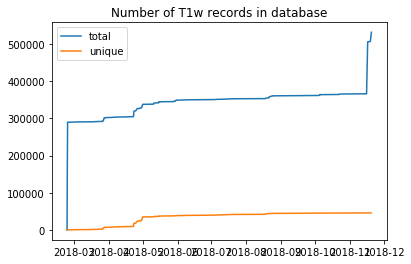

In [8]:
import datetime
from dateutil import parser
import matplotlib.dates as mdates

dates_t1w = [parser.parse(d) for d in df_t1w['_created'].values]
dates_t1w.sort()

dates_t1w_u = [parser.parse(d) for d in df_t1w_unique['_created'].values]
dates_t1w_u.sort()
# mindate = dates_t1w[0]
ax = plt.subplot(111)
ax.plot(dates_t1w, list(range(1, len(dates_t1w) + 1)), label='total')
ax.plot(dates_t1w_u, list(range(1, len(dates_t1w_u) + 1)), label='unique')
ax.set_title('Number of T1w records in database')
ax.legend()

#plt.savefig("fig03a-0.svg", bbox_inches='tight', transparent=False, pad_inches=0)

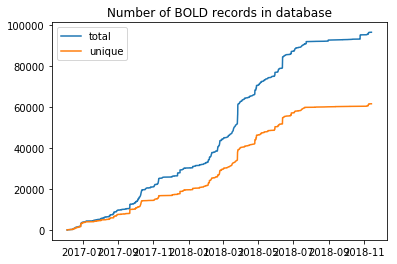

In [9]:
dates_bold = [parser.parse(d) for d in df_bold['_created'].values]
dates_bold.sort()
dates_bold_u = [parser.parse(d) for d in df_bold_unique['_created'].values]
dates_bold_u.sort()
# mindate = dates_t1w[0]
ax = plt.subplot(111)
ax.plot(dates_bold, list(range(1, len(dates_bold) + 1)), label='total')
ax.plot(dates_bold_u, list(range(1, len(dates_bold_u) + 1)), label='unique')
ax.set_title('Number of BOLD records in database')
ax.legend()
#plt.savefig("fig03a-1.svg", bbox_inches='tight', transparent=False, pad_inches=0)

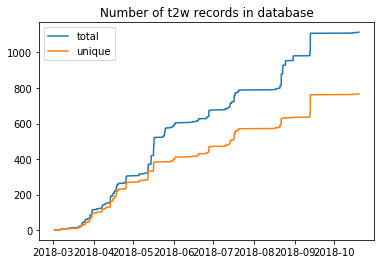

In [10]:
dates_t2w = [parser.parse(d) for d in df_t2w['_created'].values]
dates_t2w.sort()
dates_t2w_u = [parser.parse(d) for d in df_t2w_unique['_created'].values]
dates_t2w_u.sort()
# mindate = dates_t1w[0]
ax = plt.subplot(111)
ax.plot(dates_t2w, list(range(1, len(dates_t2w) + 1)), label='total')
ax.plot(dates_t2w_u, list(range(1, len(dates_t2w_u) + 1)), label='unique')
ax.set_title('Number of t2w records in database')
ax.legend()
#plt.savefig("fig03a-1.svg", bbox_inches='tight', transparent=False, pad_inches=0)

## Playing with T1w IQMs

Let's plot some of the IQMs for the T1w modality. First, let's check the names of the IQMs. These measures are explained in the documentation (http://mriqc.readthedocs.io/en/stable/iqms/t1w.html)

In [6]:
print(','.join([l for l in df_t1w.columns 
                if not l.startswith('_') and not l.startswith('bids_meta') and not l.startswith('provenance')]))

cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,icvs_gm,icvs_wm,inu_med,inu_range,qi_1,qi_2,rpve_csf,rpve_gm,rpve_wm,size_x,size_y,size_z,snr_csf,snr_gm,snr_total,snr_wm,snrd_csf,snrd_gm,snrd_total,snrd_wm,spacing_x,spacing_y,spacing_z,summary_bg_k,summary_bg_mad,summary_bg_mean,summary_bg_median,summary_bg_n,summary_bg_p05,summary_bg_p95,summary_bg_stdv,summary_csf_k,summary_csf_mad,summary_csf_mean,summary_csf_median,summary_csf_n,summary_csf_p05,summary_csf_p95,summary_csf_stdv,summary_gm_k,summary_gm_mad,summary_gm_mean,summary_gm_median,summary_gm_n,summary_gm_p05,summary_gm_p95,summary_gm_stdv,summary_wm_k,summary_wm_mad,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max


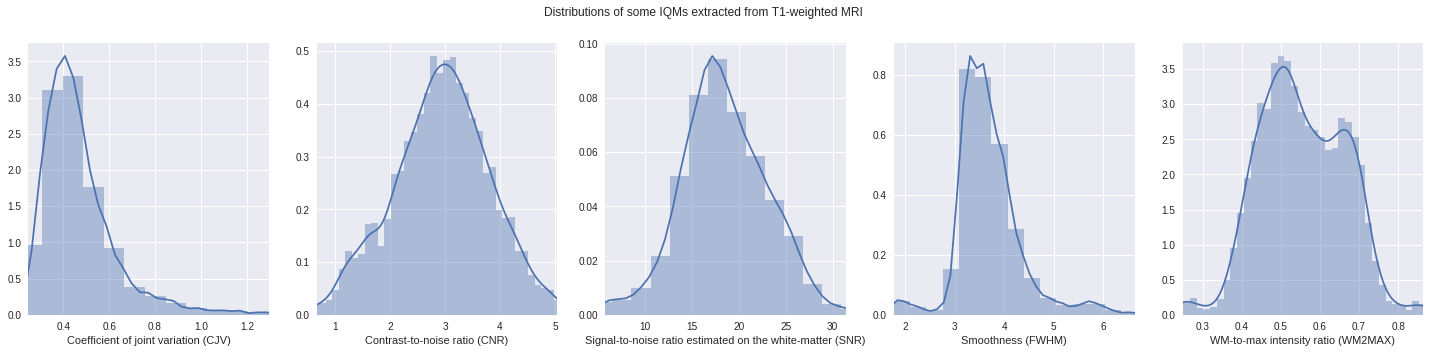

In [7]:
f, ax = plt.subplots(1, 5, figsize=(25,5))
plot_measure(df_t1w_unique.cjv, xlabel='Coefficient of joint variation (CJV)', ax=ax[0])
plot_measure(df_t1w_unique.cnr, xlabel='Contrast-to-noise ratio (CNR)', ax=ax[1])
plot_measure(df_t1w_unique.snr_wm, xlabel='Signal-to-noise ratio estimated on the white-matter (SNR)', ax=ax[2])
plot_measure(df_t1w_unique.fwhm_avg, xlabel='Smoothness (FWHM)', ax=ax[3])
plot_measure(df_t1w_unique.wm2max, xlabel='WM-to-max intensity ratio (WM2MAX)', ax=ax[4])
plt.suptitle('Distributions of some IQMs extracted from T1-weighted MRI')
plt.savefig("fig03b-0.svg", bbox_inches='tight', transparent=False, pad_inches=0)

## Playing with BOLD IQMs

Let's plot some of the IQMs for the BOLD modality. First, let's check the names of the IQMs. These measures are explained in the documentation (http://mriqc.readthedocs.io/en/stable/iqms/bold.html)

In [8]:
print(','.join([l for l in df_bold.columns 
                if not l.startswith('_') and not l.startswith('bids_meta') and not l.startswith('provenance')]))

aor,aqi,dummy_trs,dvars_nstd,dvars_std,dvars_vstd,efc,fber,fd_mean,fd_num,fd_perc,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,gcor,gsr_x,gsr_y,size_t,size_x,size_y,size_z,snr,spacing_tr,spacing_x,spacing_y,spacing_z,summary_bg_k,summary_bg_mad,summary_bg_mean,summary_bg_median,summary_bg_n,summary_bg_p05,summary_bg_p95,summary_bg_stdv,summary_fg_k,summary_fg_mad,summary_fg_mean,summary_fg_median,summary_fg_n,summary_fg_p05,summary_fg_p95,summary_fg_stdv,tsnr


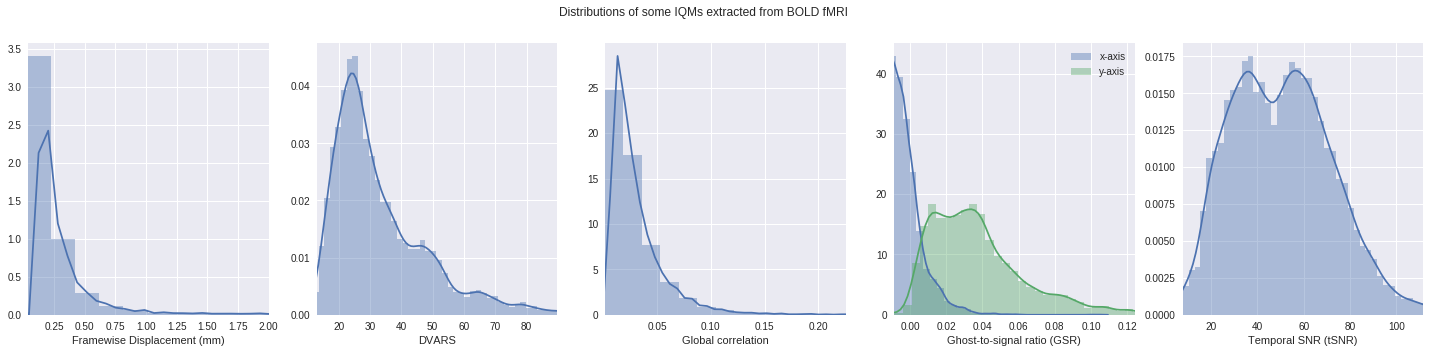

In [9]:
f, ax = plt.subplots(1, 5, figsize=(25,5))
plot_measure(df_bold_unique[df_bold_unique.fd_mean < 10].fd_mean, xlabel='Framewise Displacement (mm)', max=2, ax=ax[0])
plot_measure(df_bold_unique[df_bold_unique.dvars_nstd < 100].dvars_nstd, xlabel='DVARS', ax=ax[1])
plot_measure(df_bold_unique.gcor, xlabel='Global correlation', ax=ax[2])
plot_measure(df_bold_unique.gsr_x, label='x-axis', ax=ax[3])
plot_measure(df_bold_unique.gsr_y, xlabel='Ghost-to-signal ratio (GSR)', label='y-axis', ax=ax[3])
ax[3].legend()
plot_measure(df_bold_unique.tsnr, xlabel='Temporal SNR (tSNR)', ax=ax[4])
plt.suptitle('Distributions of some IQMs extracted from BOLD fMRI')
plt.savefig("fig03b-1.png", bbox_inches='tight', transparent=False, pad_inches=0, facecolor='white')

# Look at T-Statistic Neighbor Embedding of QC Metrics
Scikit-Learns TSNE function: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Code above this point written by Oscar Esteban
TSNE analysis suggested by Satrajit Ghosh

In [11]:
# Save out snapshot of data used in the below analyses
# Data downloaded 2018-11-28
df_t1w_unique.to_csv('t1_unique.csv', index = False)
df_bold_unique.to_csv('bold_unique.csv', index = False)
df_t1w_unique.to_csv('t1w_unique.csv', index = False)

## T1w TSNE

In [ ]:
# Split up collumns
metric_columns = [l for l in df_t1w.columns 
                if not l.startswith('_') and not l.startswith('bids_meta') and not l.startswith('provenance')]
meta_columns =[l for l in df_t1w_unique.columns 
                if not l.startswith('_') and l.startswith('bids_meta') and not l.startswith('provenance')]


X = df_t1w_unique.loc[:,metric_columns]
# Drop rows with null data
notnull_mask = X.notnull().sum(1)
Xnn = X.loc[notnull_mask==68,:]
perplexities=[2, 30, 50, 500, 5000]
res_df = df_t1w_unique.loc[df_t1w_unique.loc[:,metric_columns].isnull().sum(1)==0,meta_columns]

for i, pp in enumerate(perplexities):
    print(pp, end=', ')
    res = TSNE(n_iter=5000, perplexity=pp).fit_transform(Xnn)
    res_df['x_%05d'%pp] = res[:,0]
    res_df['y_%05d'%pp] = res[:,1]

2, 30, 50, 

In [100]:
res_df.to_csv('t1_tsnes.csv', index=None)

### Clean up meta factors

In [85]:
model_dict = {'Signa_HDxt': 'Signa HDxt',
              'Signa HDxt': 'Signa HDxt',
              'SIGNA_HDx': 'Signa HDx',
              'SIGNA_PET_MR': 'Signa PET-MR',
              'SIGNA_EXCITE': 'Signa Excite',
              'SIGNA_Premier': 'Signa Premier',
              'Signa': 'Signa',
              'GENESIS_SIGNA': 'Signa Genesis',
              'Symphony': 'Symphony',
              'SymphonyTim': 'Symphony',
              'TrioTim': 'Tim Trio',
              'Magnetom Trio' : 'Tim Trio',
              'TIM TRIO': 'Tim Trio',
              'MAGNETOM Trio': 'Tim Trio',
              'TRIOTIM': 'Tim Trio',
              'Trio': 'Tim Trio',
              'Trio TIM': 'Tim Trio',
              'TRIO': 'Tim Trio',
              'MAGNETOM Trio A Tim': 'Tim Trio',
              'TimTrio': 'Tim Trio',
              'TriTim': 'Tim Trio',
              'MAGNETOM and Jerry': 'MAGNETOM and Jerry',
              'Trio Magnetom': 'Tim Trio',
              'Prisma_fit': 'Prisma',
              'Prisma': 'Prisma',
              'Skyra': 'Skyra',
              'Intera': 'Intera',
              'Allegra': 'Allegra',
              'Verio': 'Verio',
              'Avanto': 'Avanto',
              'Sonata': 'Sonata',
              'Espree': 'Espree',
              'SonataVision': 'Sonata Vision',
              'Spectra':'Spectra',
              'Ingenia' : 'Ingenia',
              'DISCOVERY MR750': 'Discovery MR750',
              'DISCOVERY_MR750': 'Discovery MR750',
              'DISCOVERY_MR750w': 'Discovery MR750',
              'MR750': 'Discovery MR750',
              'Achieva_dStream': 'Achieva dStream',
              'Achieva Ds': 'Achieva dStream',
              'Achieva': 'Achieva',
              'Achieva TX': 'Achieva TX',
              'Intera_Achieva': 'Achieva',
              'GEMINI': 'Gemini',
              'Ingenuity': 'Ingenuity',
              'Gyroscan_Intera': 'Gyroscan Intera',
              'Biograph_mMR': 'Biograph mMR',
              'NUMARIS_4': 'Numaris 4',
              'N/A': np.nan,
              '': np.nan,
              'DicomCleaner': np.nan}

In [84]:
pd.unique(bad)

array(['DicomCleaner'], dtype=object)

In [56]:
def clean_factor(df, new_names, column):
    mlist = []
    bad = []
    for old_name in df[column]:
        try:
            mlist.append(new_names[old_name])
        except KeyError:
            if pd.notnull(old_name):
                bad.append(old_name)
            mlist.append(np.nan)
    return bad, mlist

In [101]:
res_df.columns

Index(['bids_meta.AccelNumReferenceLines', 'bids_meta.AccelerationFactorPE',
       'bids_meta.AcquisitionMatrix', 'bids_meta.ConversionSoftware',
       'bids_meta.ConversionSoftwareVersion', 'bids_meta.DeviceSerialNumber',
       'bids_meta.EchoTime', 'bids_meta.EchoTrainLength',
       'bids_meta.EffectiveEchoSpacing', 'bids_meta.FlipAngle',
       'bids_meta.ImageType', 'bids_meta.ImagingFrequency',
       'bids_meta.InPlanePhaseEncodingDirection',
       'bids_meta.InstitutionAddress', 'bids_meta.InstitutionName',
       'bids_meta.InversionTime', 'bids_meta.MRAcquisitionType',
       'bids_meta.MagneticFieldStrength', 'bids_meta.Manufacturer',
       'bids_meta.ManufacturersModelName', 'bids_meta.NumberOfAverages',
       'bids_meta.NumberOfPhaseEncodingSteps',
       'bids_meta.ParallelAcquisitionTechnique',
       'bids_meta.ParallelReductionFactorInPlane', 'bids_meta.PartialFourier',
       'bids_meta.PatientPosition', 'bids_meta.PercentPhaseFieldOfView',
       'bids_meta.Per

In [83]:
bad, mlist = clean_factor(res_df, model_dict, 'bids_meta.ManufacturersModelName')

In [86]:
res_df['ManufacturersModelNamefix'] = mlist

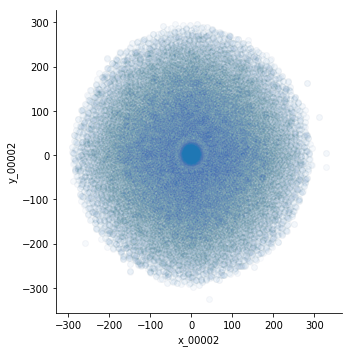

In [102]:

sns.lmplot('x_00002','y_00002', res_df, fit_reg = False, n_boot = 0, scatter_kws = {"alpha":0.01 })

In [ ]:
sns.lmplot('x','y', res_df, fit_reg = False, n_boot = 0,hue = "bids_meta.Manufacturer", scatter_kws = {"alpha":0.01 })

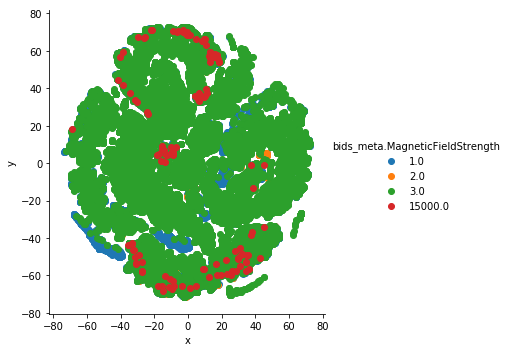

In [29]:
sns.lmplot('x','y', res_df, fit_reg = False, n_boot = 0,hue = "bids_meta.MagneticFieldStrength", scatter_kws = {"alpha":1 })

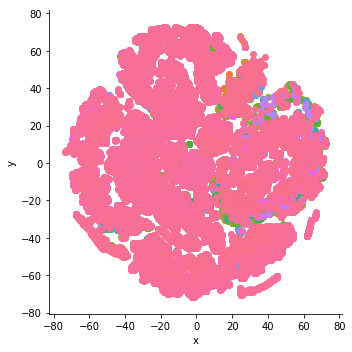

In [87]:
sns.lmplot('x','y', res_df, fit_reg = False, n_boot = 0,hue = "bids_meta.RepetitionTime", scatter_kws = {"alpha":1 }, legend = False)

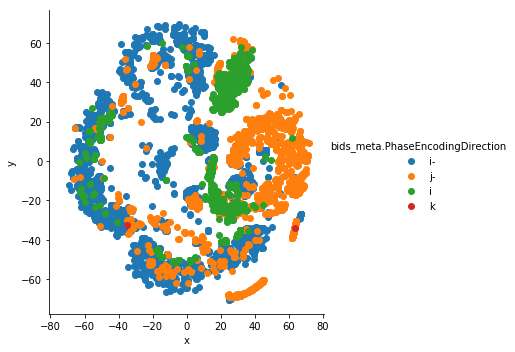

In [31]:
sns.lmplot('x','y', res_df, fit_reg = False, n_boot = 0,hue = "bids_meta.PhaseEncodingDirection", scatter_kws = {"alpha":1 })

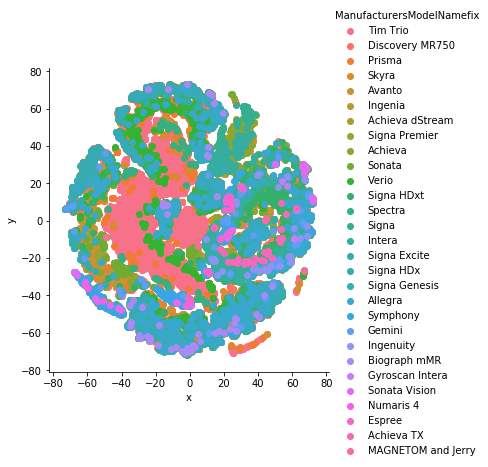

In [88]:
sns.lmplot('x','y', res_df, fit_reg = False, n_boot = 0,hue = "ManufacturersModelNamefix", scatter_kws = {"alpha":1 })

In [86]:
meta_to_plot = ["bids_meta.Manufacturer",
                "ManufacturersModelNamefix",
                "bids_meta.PhaseEncodingDirection",
                "bids_meta.MagneticFieldStrength",
                "bids_meta.RepetitionTime",
                "bids_meta.ReceiveCoilName"]

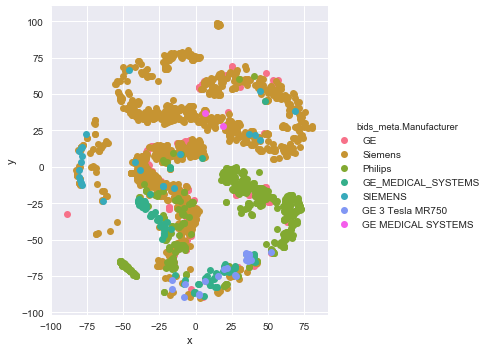

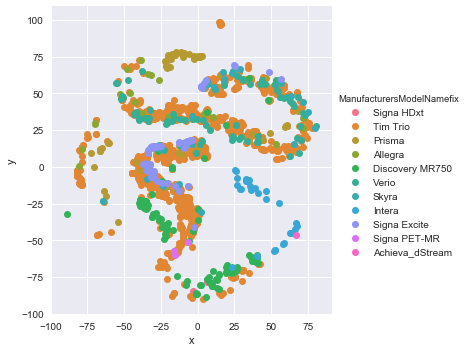

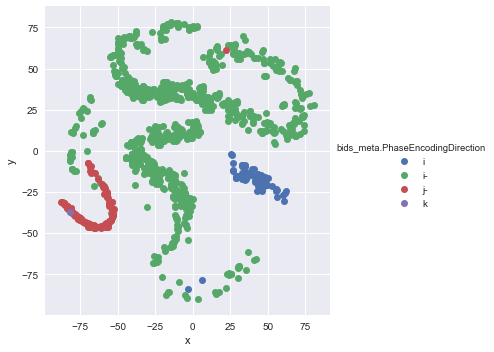

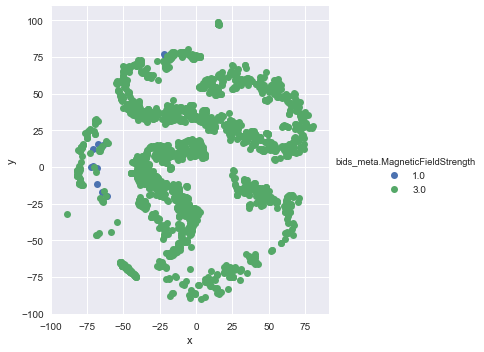

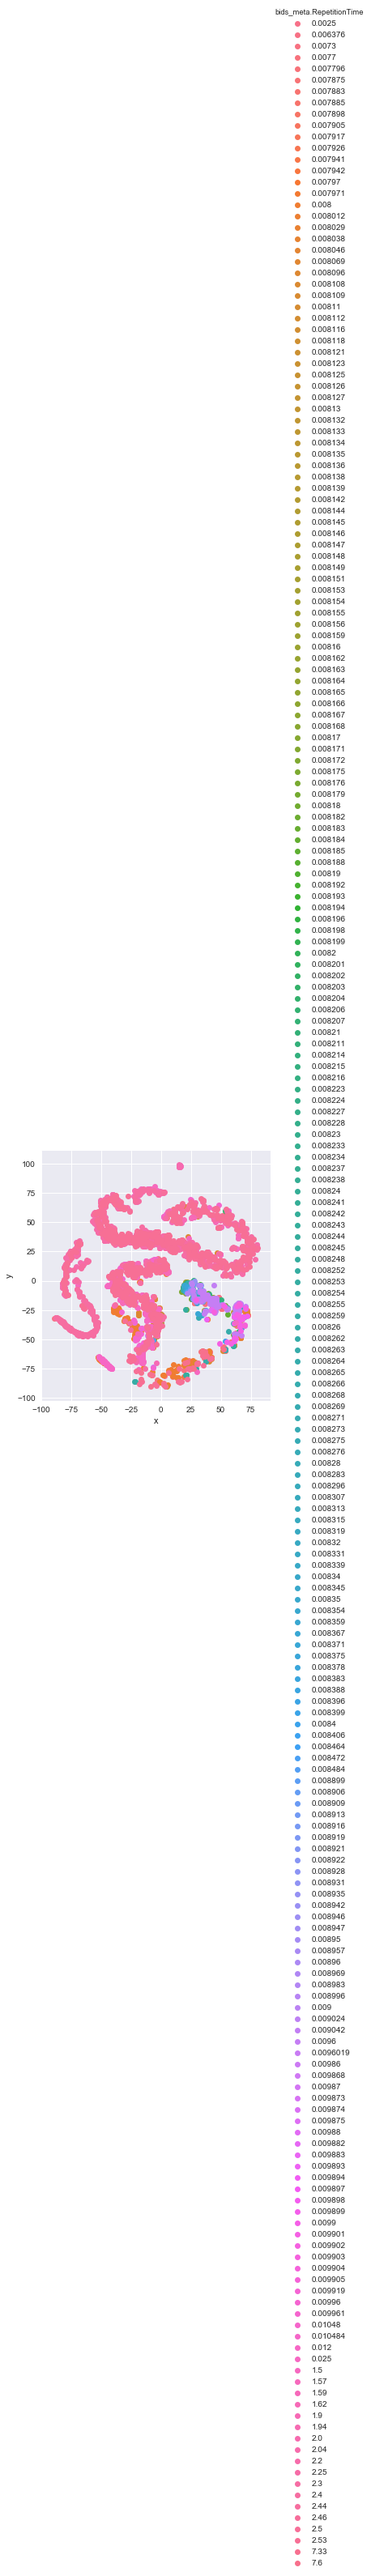

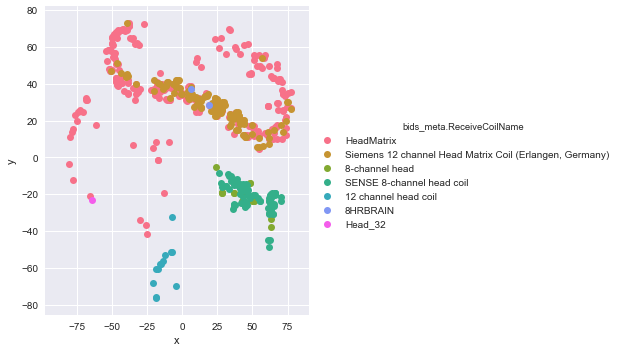

In [93]:
#fig, axs = plt.subplots(2,3, figsize = (10,10))
for mtp, ax in zip(meta_to_plot, axs.flatten()):
    sns.lmplot('x','y', res_df, fit_reg = False, n_boot = 0,hue = mtp, scatter_kws = {"alpha":1 })
    #if mtp == "bids_meta.RepetitionTime":
    #    ax.legend_.remove()

In [85]:
ax.legend

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d7353c8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13011bf98>], dtype=object)

In [70]:
model_dict = {'Signa_HDxt': 'Signa HDxt',
        'SIGNA_PET_MR': 'Signa PET-MR',
        'SIGNA_EXCITE': 'Signa Excite',
        'TrioTim': 'Tim Trio',
        'Magnetom Trio' : 'Tim Trio',
        'TIM TRIO': 'Tim Trio',
        'MAGNETOM Trio': 'Tim Trio',
        'TRIOTIM': 'Tim Trio',
        'Trio': 'Tim Trio',
        'Trio TIM': 'Tim Trio',
        'TRIO': 'Tim Trio',
        'Prisma_fit': 'Prisma',
        'Prisma': 'Prisma',
        'Skyra': 'Skyra',
        'Intera': 'Intera',
        'Allegra': 'Allegra',
        'Verio': 'Verio',
        'DISCOVERY MR750': 'Discovery MR750',
        'DISCOVERY_MR750': 'Discovery MR750',
        'DISCOVERY_MR750w': 'Discovery MR750',
        'Achieva_dStream': 'Achieva_dStream',
        'N/A': np.nan,
        '': np.nan}

In [146]:
model_dict = {k.upper():v for k,v in model_dict.items()}

## bold TSNE

In [126]:
np.logical_not(np.isfinite(X)).sum(1).sum()
X.notnull().sum(1).sum()

896761

In [31]:
# Split up collumns
metric_columns = [l for l in df_bold_unique.columns 
                if not l.startswith('_') and not l.startswith('bids_meta') and not l.startswith('provenance')]
meta_columns =[l for l in df_bold_unique.columns 
                if not l.startswith('_') and l.startswith('bids_meta') and not l.startswith('provenance')]


X = df_bold_unique.loc[:,metric_columns]
# Drop rows with null data and outside float32 rane
notnull_mask = (X.notnull() & (X <= np.finfo(np.float32).max) & (X >= np.finfo(np.float32).min)).all(1)
# Drop rows with data outside float32 range
Xnn = X.loc[notnull_mask,:]
perplexities=[2, 30, 50, 500, 1000]
res_df = df_bold_unique.loc[notnull_mask,meta_columns]

for i, pp in enumerate(perplexities):
    print(pp, end=', ')
    res = TSNE(n_iter=5000, perplexity=pp).fit_transform(Xnn)
    res_df['x_%05d'%pp] = res[:,0]
    res_df['y_%05d'%pp] = res[:,1]

2, 30, 50, 500, 5000, 

MemoryError: 

In [35]:
res_df.to_csv('bold_tsnes.csv', index=None)

In [89]:
# Split up collumns
metric_columns = [l for l in df_bold_unique.columns 
                if not l.startswith('_') and not l.startswith('bids_meta') and not l.startswith('provenance')]
meta_columns =[l for l in df_bold_unique.columns 
                if not l.startswith('_') and l.startswith('bids_meta') and not l.startswith('provenance')]


X = df_bold_unique.loc[:,metric_columns]
# Drop rows with null data
notnull_mask = np.logical_and(X.notnull().sum(1).astype(bool), np.logical_not(np.logical_not(np.isfinite(X)).sum(1).astype(bool)))
Xnn = X.loc[notnull_mask,:]
res = TSNE().fit_transform(Xnn)


In [90]:
res_df = df_bold_unique.loc[notnull_mask,meta_columns]
res_df['x'] = res[:,0]
res_df['y'] = res[:,1]

In [129]:
res_df.notnull().sum(0)

bids_meta.CogAtlasID                            2630
bids_meta.CogPOID                                299
bids_meta.ConversionSoftware                    2662
bids_meta.ConversionSoftwareVersion             2021
bids_meta.DeviceSerialNumber                     591
bids_meta.EchoTime                             17180
bids_meta.EchoTrainLength                        759
bids_meta.EffectiveEchoSpacing                 11203
bids_meta.FlipAngle                            13021
bids_meta.HardcopyDeviceSoftwareVersion          261
bids_meta.ImageType                             2551
bids_meta.ImagingFrequency                       616
bids_meta.InPlanePhaseEncodingDirection          179
bids_meta.InstitutionAddress                     795
bids_meta.InstitutionName                        939
bids_meta.Instructions                           205
bids_meta.InversionTime                          616
bids_meta.MRAcquisitionType                     1019
bids_meta.MagneticFieldStrength               

In [167]:
bad, res_df['Manufacturers Model Name'] = clean_factor(res_df,model_dict,'bids_meta.ManufacturersModelName' )

In [168]:
[ss.upper() for ss in np.unique(bad)]

[]

In [166]:
model_dict["ACHIEVA"] = 'Achieva'
model_dict["PHILIPS ACHIEVA"] = 'Achieva'
model_dict["INTERA ACHIEVA"] = 'Achieva'
model_dict["MAGNETOM SKYRA FIT"] = 'Skyra'
model_dict['SIGNA TWIN SPEED EXCITE HD SCANNE'] = 'Signa Excite'
model_dict["SIGNA_HDX"] = 'Signa HDX'
model_dict["SIGNA HDE"] = 'Signa HDE'
model_dict["AVANTO"] = 'Avanto'


In [148]:
bad

['Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Tim TRIO',
 'Signa_HDxt',
 'Signa_HDxt',
 'Signa_HDxt',
 'Signa_HDxt',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'TrioTim',
 'Tri

In [155]:
def clean_factor(df, new_names, column):
    mlist = []
    bad = []
    for old_name in df[column]:
        try:
            mlist.append(new_names[old_name.upper()])
        except (KeyError, AttributeError):
            if pd.notnull(old_name):
                bad.append(old_name)
            mlist.append(np.nan)
    return bad, mlist

In [139]:
df = res_df
new_names = model_dict
column = 'bids_meta.ManufacturersModelName'
mlist = []
bad = []
for old_name in df[column]:
    try:
        mlist.append(new_names[old_name])
    except KeyError:
        if pd.notnull(old_name):
            bad.append(old_name)
        mlist.append(np.nan)

In [169]:
res_df["bids_meta.MultibandAccelerationFactor"].unique()

array([ nan,   3.,   8.,   6.,   4.])

In [172]:
meta_to_plot = ["bids_meta.Manufacturer",
                "Manufacturers Model Name",
                "bids_meta.PhaseEncodingDirection",
                "bids_meta.MagneticFieldStrength",
                "bids_meta.RepetitionTime",
                "bids_meta.ReceiveCoilName",
                "bids_meta.MultibandAccelerationFactor"]

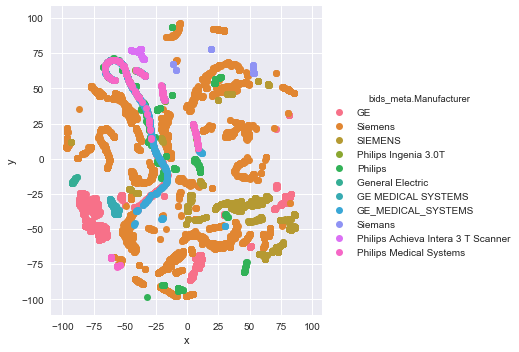

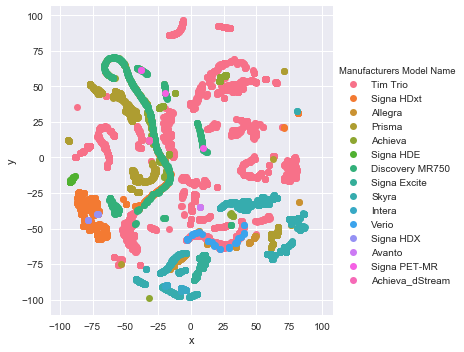

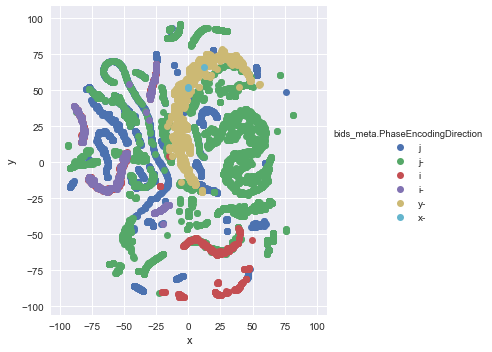

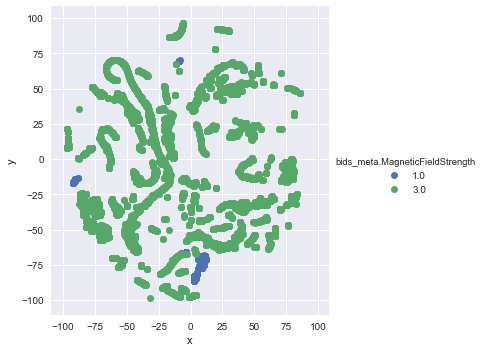

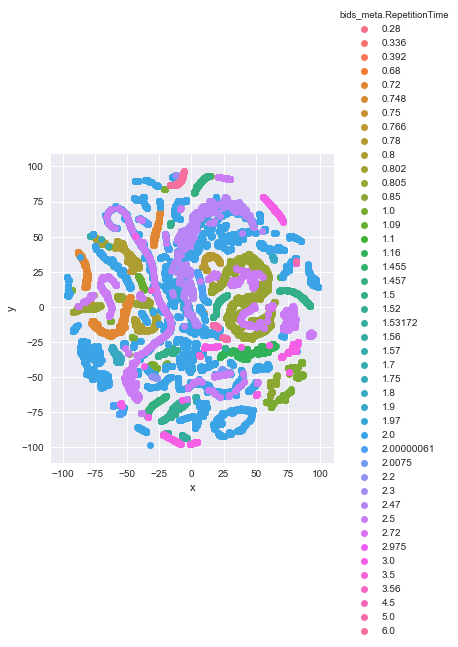

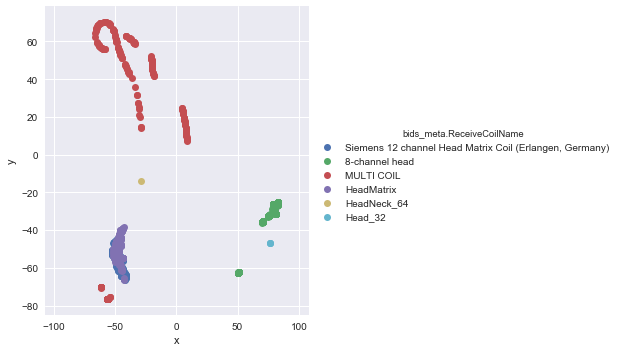

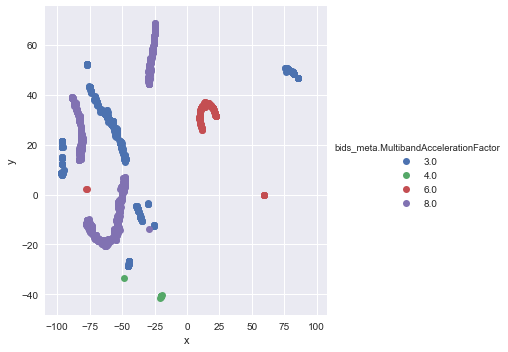

In [175]:
for mtp in meta_to_plot:
    sns.lmplot('x','y', res_df, fit_reg = False, n_boot = 0,hue = mtp, scatter_kws = {"alpha":1 })
